In [ ]:
%matplotlib inline
import requests
import bs4
import numpy as np
import pandas as pd
from IPython.display import HTML

## Outline
* DOM
* Parsing HTML
* API requests

### The Anatomy of HTML

* **HTML Document**: the totality of markup that makes up a web-page
* **Document Object Model**: the internal representation of a HTML document as a *tree* structure.

* **HTML Element**: An object in the DOM, such as a paragraph, header, title.
* **HTML Tags**: Markers that denote the *start* and *end* of an element. E.g. `<p>` and `</p>`.



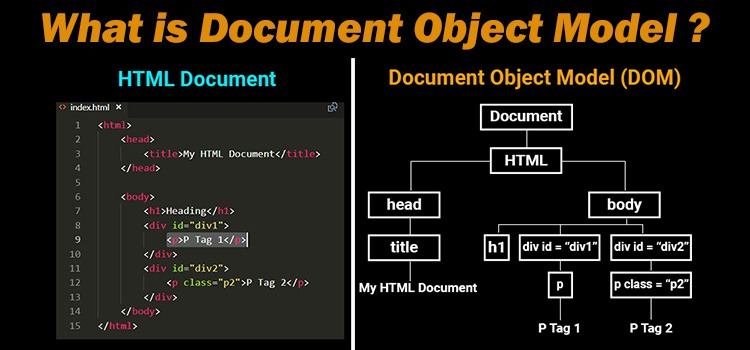

In [ ]:
!cat data/lec10.html

### HTML Tags

HTML tags define both:
* document structure elements and 
* document head/body elements.

<img src="imgs/webpage_anatomy.png" width="50%">

### Useful tags to know:

|Structure Elements|Description|Head/Body Elements|Description|
|---|---|---|---|
|`<html>`|the document|`<p>`|the paragraph|
|`<head>`|the header|`<h1>, <h2>, ...`|header(s)|
|`<body>`|the body|`<img>`|images|
|`<div>` |a logical division of the document|`<a>`| anchor (hyper-link)|
|`<span>`|an *in-line* logical division|[MANY MORE](https://en.wikipedia.org/wiki/HTML_element)||


### Example: Images and Hyperlinks

* Tag for a picture (can use a link to the image):
```
<img src="HumDum.png" alt="Humbpty Dumpty">
```

* Tag for a hyperlink: 

```
<a href="https://ucsd.edu/">Visit our page!</a>
```


## div tag

```
<div style="background-color:lightblue">
  <h3>This is a heading</h3>
  <p>This is a paragraph.</p>
</div>
```

* The `<div>` tag defines a division or a section in an HTML document.

* The `<div>` element is often used as a container for other HTML elements to style them with CSS or to perform certain tasks with JavaScript.

* Often has attributes (important for scraping!)


In [ ]:
# Create a sample page!

## The HTML Document Tree

* DOM represents a document as a logical tree.

<div class="image-txt-container">

<img src="imgs/webpage_anatomy.png" width="50%">

</div>    

Draw a DOM (tree) yourself!

## The HTML Document Tree

* DOM represents a document as a logical tree.

<div class="image-txt-container">

<img src="imgs/webpage_anatomy.png" width="50%">

<img src="imgs/dom_tree.png" width="50%">

</div> 

### Question: "quotes collection" website

* What do you think the DOM tree look like? (roughly)
* What would your table schema (i.e. rows/columns) look like?

<img src="imgs/quotes2scrape.png">

### Example (rough) document tree

* How you would you parse it, if you wanted to collect data:
    - Quote-by-quote (all attributes)?
    - Attribute-by-attribute?
    
<div class="image-txt-container">

<img src="imgs/quotes2scrape.png" width="50%">
    
<img src="imgs/quote_dom.png" width="50%">

</div> 

## BeautifulSoup: parsing the document tree

* [Beautiful Soup 4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a python HTML parser.
* **Warning:** BeautifulSoup has changed between versions, so make sure you are looking at documentation for the version you are using (4 here).

* Parse a small HTML "page", with corresponding tree below:

<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
s = '''
<body>

  <div id="content">
    <h1>Heading here</h1>
    <p>My First paragraph</p>
    <p>My <em>second</em> paragraph</p>
    <hr>
  </div>
  
  <div id="nav">
    <ul>
      <li>item 1</li>
      <li>item 2</li>
      <li>item 3</li>
    </ul>
  </div>

</body>
'''

In [ ]:
# we can render it

HTML(s)

### BeautifulSoup Parsing

* `bs4.BeautifulSoup` parses a string or file-like object representing HTML
* Returns a *parsed document*
* Use the `children` property to access child nodes.

In [ ]:
# builder: what we use to parse HTML
help(bs4.BeautifulSoup)

In [ ]:
print(s)

In [ ]:
# usually s is a result of a GET request

soup = bs4.BeautifulSoup(s)
#soup
print(soup.prettify())

In [ ]:
# DOM object, tree structure
type(soup)

In [ ]:
# many useful attributes 
# print just the text
# What is a text on this document?

print(soup.text)

In [ ]:
soup

In [ ]:
#soup.children
#type(soup.children)

In [ ]:
# detour

lst = [1,2,3,4]
double = map(lambda x: x*2, lst)
double
# what is the output?

In [ ]:
next(double)

In [ ]:
list(double)

In [ ]:
# what is the list iterator?
# Why are they useful?

list(soup.children)

In [ ]:
root = list(soup.children)[0]

In [ ]:
# output? The first child: everything under the "document"
root

In [ ]:
# it includes the text between the tags as leaf nodes in the tree

list(root.children)

### Discussion Question

What is the output of the following code:
```
list(list(list(soup.children)[0].children)[0].children)
```



<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
list(list(list(soup.children)[0].children)[0].children)

### Document tree traversal: depth-first

* Using `.children` attribute, traverse `soup` depth-first.
* Take care to only print node elements!

<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
soup

### Document tree traversal: depth-first

* Using `.children` attribute, traverse `soup` depth-first.
* Take care to only print node elements!

<img src="imgs/dom_tree_1.png" width="75%">

In [ ]:
# depth first search

def dfs(elt, visited):
    if elt not in visited:
        visited.append(elt)
        print(elt.name)
        for e in elt.children:
            if not isinstance(e, str):
                dfs(e, visited)
    return visited

In [ ]:
dfs(soup, [])

In [ ]:
# DFS using `descendants` property

children = []
for x in soup.descendants:
    print("HERE: " + str(x))
    children.append(x)

In [ ]:
children

## Selecting attributes of nodes
* The `.text` property of a tag element gets the text elements between the tags.
* The `.attrs` property lists all attributes of a tag.
* The `.get(key)` method, gets the value of a tag attribute.

In [123]:
# iterator, follows DFS order
#children = []
#for x in soup.descendants:
#    print("HERE: " + str(x))
#    children.append(x)

soup = bs4.BeautifulSoup(s)
soup.descendants

<generator object Tag.descendants at 0x11d214e50>

In [124]:
for x in soup.descendants:
    print(x)

<html><body>
<div id="content">
<h1>Heading here</h1>
<p>My First paragraph</p>
<p>My <em>second</em> paragraph</p>
<hr/>
</div>
<div id="nav">
<ul>
<li>item 1</li>
<li>item 2</li>
<li>item 3</li>
</ul>
</div>
</body>
</html>
<body>
<div id="content">
<h1>Heading here</h1>
<p>My First paragraph</p>
<p>My <em>second</em> paragraph</p>
<hr/>
</div>
<div id="nav">
<ul>
<li>item 1</li>
<li>item 2</li>
<li>item 3</li>
</ul>
</div>
</body>


<div id="content">
<h1>Heading here</h1>
<p>My First paragraph</p>
<p>My <em>second</em> paragraph</p>
<hr/>
</div>


<h1>Heading here</h1>
Heading here


<p>My First paragraph</p>
My First paragraph


<p>My <em>second</em> paragraph</p>
My 
<em>second</em>
second
 paragraph


<hr/>




<div id="nav">
<ul>
<li>item 1</li>
<li>item 2</li>
<li>item 3</li>
</ul>
</div>


<ul>
<li>item 1</li>
<li>item 2</li>
<li>item 3</li>
</ul>


<li>item 1</li>
item 1


<li>item 2</li>
item 2


<li>item 3</li>
item 3










In [125]:
hdr = list(soup.descendants)[5]
hdr

<h1>Heading here</h1>

In [ ]:
hdr

In [126]:
hdr.text

'Heading here'

In [127]:
# key: id

div = list(soup.descendants)[20]
div

<div id="nav">
<ul>
<li>item 1</li>
<li>item 2</li>
<li>item 3</li>
</ul>
</div>

In [128]:
div.attrs

{'id': 'nav'}

In [129]:
div.get('id')

'nav'

## Selecting subtrees of the document tree

* Use the BeautifulSoup methods `find_**` to select subtrees
* `soup.find(name=None, attrs={}, recursive=True, text=None, **kwargs)`

## Selecting subtrees of the document tree

* Using `soup.find('div')`:


<div class="image-txt-container">
    
<img src="imgs/dom_tree_1.png" width="50%">
  
<img src="imgs/dom_subtree_1.png" width="40%">
    
</div>

In [130]:
# returns the subtree of the DOM, follows DFS order
div = soup.find('div')
div

<div id="content">
<h1>Heading here</h1>
<p>My First paragraph</p>
<p>My <em>second</em> paragraph</p>
<hr/>
</div>

In [131]:
type(div)

bs4.element.Tag

In [132]:
# more specific
soup.find('div', attrs={'id': 'nav'})

<div id="nav">
<ul>
<li>item 1</li>
<li>item 2</li>
<li>item 3</li>
</ul>
</div>

In [133]:
# all divs
soup.find_all('div')

[<div id="content">
 <h1>Heading here</h1>
 <p>My First paragraph</p>
 <p>My <em>second</em> paragraph</p>
 <hr/>
 </div>, <div id="nav">
 <ul>
 <li>item 1</li>
 <li>item 2</li>
 <li>item 3</li>
 </ul>
 </div>]

In [134]:
lsts = soup.find_all('li')
lsts

[<li>item 1</li>, <li>item 2</li>, <li>item 3</li>]

In [135]:
[x.text for x in soup.find_all('li')]

['item 1', 'item 2', 'item 3']

### Example: extracting data from HTML

* Let's parse the `dsc.ucsd.edu` schedule

<!DOCTYPE html>
<html lang="en-US"><head><meta charset="utf-8"/><link href="https://gmpg.org/xfn/11" rel="profile"/><style media="all">img.wp-smiley,img.emoji{display:inline !important;border:none !important;box-shadow:none !important;height:1em !important;width:1em !important;margin:0 .07em !important;vertical-align:-.1em !important;background:0 0 !important;padding:0 !important}
.tribe-common{-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale;font-smoothing:antialiased}.tribe-common *{box-sizing:border-box}.tribe-common article,.tribe-common aside,.tribe-common details,.tribe-common figcaption,.tribe-common figure,.tribe-common footer,.tribe-common header,.tribe-common main,.tribe-common menu,.tribe-common nav,.tribe-common section,.tribe-common summary{display:block}.tribe-common svg:not(:root){overflow:hidden}.tribe-common audio,.tribe-common canvas,.tribe-common progress,.tribe-common video{display:inline-block}.tribe-common audio:not([controls]){display:none;hei
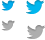

In [136]:
url = "http://dsc.ucsd.edu/node/10"
r = requests.get(url)   
urlText = r.text


from bs4 import BeautifulSoup
soup = BeautifulSoup(urlText, 'html.parser')
soup   # parsed DS page

In [137]:
# we can extract the title of the document

soup.find('title')
soup.title.text

'Undergraduate – Halıcıoğlu Data Science Institute'

In [138]:
# we can extract the first paragraph 

soup.find('p')

#open link in the browser, right click and "page source". Can you find <p> tags?
# and hyperlinks

<p>UC San Diego and UC San Diego Health leadership are working closely with federal and state officials to help slow the spread of Covid-19. Stay up to date with the latest developments.</p>

In [139]:
# Grab all the links

all_links  = soup.find_all('a')
all_links


[<a class="screen-reader-text skip-link" href="#content" title="Skip to content">Skip to content</a>,
 <a class="alert-link text-right text-link small no-hover" href="https://coronavirus.ucsd.edu/">View Details</a>,
 <a href="https://datascience.ucsd.edu/" rel="home" title="Halıcıoğlu Data Science Institute"> <img alt="Halıcıoğlu Data Science Institute" class="header-image" src="https://datascience.ucsd.edu/wp-content/uploads/2019/08/UCSanDiego_Halicioglu_BlueGold.png" title="Halıcıoğlu Data Science Institute"/> </a>,
 <a href="https://datascience.ucsd.edu/about/" title="						">About<span class="dropdown-menu-toggle" role="presentation"></span></a>,
 <a href="https://datascience.ucsd.edu/about/mission/">Mission</a>,
 <a href="https://datascience.ucsd.edu/about/our-team/">Our Team<span class="dropdown-menu-toggle" role="presentation"></span></a>,
 <a href="https://datascience.ucsd.edu/in-memoriam/">In Memoriam</a>,
 <a href="https://datascience.ucsd.edu/about/faculty/" title="						">F

In [140]:
link = all_links[10]

In [141]:
# may need to create another request
link

<a href="https://datascience.ucsd.edu/academics/" title="						">Academics<span class="dropdown-menu-toggle" role="presentation"></span></a>

In [142]:
link.attrs

{'title': '\t\t\t\t\t\t', 'href': 'https://datascience.ucsd.edu/academics/'}

In [143]:
link.get('href')

'https://datascience.ucsd.edu/academics/'

In [144]:
# print all the links and their urls
for link in soup.find_all('a'):
    print('%s:%s(%s)' %(link.text, ' '*(50 - len(link.text)) , link.get('href', ' ')[:50]))


Skip to content:                                   (#content)
View Details:                                      (https://coronavirus.ucsd.edu/)
  :                                                (https://datascience.ucsd.edu/)
About:                                             (https://datascience.ucsd.edu/about/)
Mission:                                           (https://datascience.ucsd.edu/about/mission/)
Our Team:                                          (https://datascience.ucsd.edu/about/our-team/)
In Memoriam:                                       (https://datascience.ucsd.edu/in-memoriam/)
Faculty:                                           (https://datascience.ucsd.edu/about/faculty/)
HDSI Faculty Council:                              (https://datascience.ucsd.edu/about/faculty/hdsi-fa)
Contact:                                           (https://datascience.ucsd.edu/about/contact/)
Academics:                                         (https://datascience.ucsd.edu/academics/)
Un

### Example: scraping quotes
* Collect famous quotes and related data
* Requires scraping many pages to get data
* Parse the pages to extract information

<img src="imgs/quotes2scrape.png" width="50%">

### Scraping quotes: steps
1. What information to collect?
2. What pages are needed to visit? In what order?
3. What does our table schema look like?

<img src="imgs/quotes2scrape.png" width="50%">

In [ ]:
# scraping quotes:
# Columns: quote, author, author bio, binary column for each tag
# Create a dictionary (JSON) for each record
# Translate dictionary => dataframe
# make 1-2 observations about the data.

### Scraping quotes: proposed plan

1. Function `scrape_pages(urllist)` that scrapes a list of urls.
    - `requests` is only used here!    
2. Function `parse_quote_list(soup)` that selects the quotes information from a quote page.
3. Function `parse_author_info(author_soup)` that selects the author information from an author page.

**Tip:** Have functions that request and functions that parse, but not both! 
- Easier to debug and catch errors!
- Avoids unnecessary requests!

In [ ]:
# proposed plan:

def scrape_pages(urllist):
    
    out = []
    for url in urllist:
        
        # 1. request pages
        # 2. parse page w/bs4
        # 3. parse each quote on quote page
        #         4. extract info from each quote
        #         5. get author URL for each quote
        #         6. request auth page / parse / extract
        # 7. Add parsed info (DF) to out
        pass
        
    return pd.concat(out)

### Scraping quotes: `parse_quote_list(soup)`
* Develop function on a single page of quotes
* Wrap code in `parse_quote_list`

In [145]:
resp = requests.get('http://quotes.toscrape.com/page/%d/' % 1)
soup = bs4.BeautifulSoup(resp.text)

In [146]:
# Need: quote text, author name, author url, tags
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="t

In [147]:
# grab each quote and parse!
# A quote is defined by a div with class "quote"!
quote = soup.find('div', attrs={'class': 'quote'})
quote

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>

In [148]:
# quote text
quote_text = quote.find('span', attrs='text').text
quote_text

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

In [149]:
# author name
quote_auth = quote.find('small', attrs={'class': 'author'}).text
quote_auth

'Albert Einstein'

In [150]:
# author url
auth_url = quote.find('a').get('href')
auth_url = 'http://quotes.toscrape.com' + auth_url
auth_url

'http://quotes.toscrape.com/author/Albert-Einstein'

In [151]:
# tags
#quote.find('div', attrs={'class': 'tags'})

#quote.find('div', attrs={'class': 'tags'}).find_all('a')

quote_tags = [x.text for x in quote.find('div', attrs={'class': 'tags'}).find_all('a')]
quote_tags

['change', 'deep-thoughts', 'thinking', 'world']

In [152]:
row = {}
row['quote_text'] = quote_text
row['quote_auth'] = quote_auth
row['auth_url'] = auth_url
for tag in quote_tags:
    row[tag] = 1

# Single row
pd.Series(row)

quote_text       “The world as we have created it is a process ...
quote_auth                                         Albert Einstein
auth_url         http://quotes.toscrape.com/author/Albert-Einstein
change                                                           1
deep-thoughts                                                    1
thinking                                                         1
world                                                            1
dtype: object

In [153]:
def parse_quote_list(soup):
    
    out = []
    
    # Loop through all quotes
    quotes = soup.find_all('div', attrs={'class': 'quote'})
    for quote in quotes:
        
        # parse quote elements
        quote_text = quote.find('span', attrs='text').text
        quote_auth = quote.find('small', attrs={'class': 'author'}).text
        auth_url = quote.find('a').get('href')
        quote_tags = [x.text for x in quote.find('div', attrs={'class': 'tags'}).find_all('a')]
        
        # column - value mapping
        row = {}
        row['quote_text'] = quote_text
        row['quote_auth'] = quote_auth
        row['auth_url'] = 'http://quotes.toscrape.com' + auth_url
        for tag in quote_tags:
            row['tag_%s' % tag] = 1

        out.append(row)
        
    return pd.DataFrame(out)

In [154]:
quotes_df = parse_quote_list(soup)
quotes_df

,quote_text,quote_auth,auth_url,tag_change,tag_deep-thoughts,tag_thinking,tag_world,tag_abilities,tag_choices,tag_inspirational,...,tag_adulthood,tag_success,tag_value,tag_love,tag_edison,tag_failure,tag_paraphrased,tag_misattributed-eleanor-roosevelt,tag_obvious,tag_simile
0,“The world as we have created it is a process ...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,“There are only two ways to live your life. On...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,“Try not to become a man of success. Rather be...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,“It is better to be hated for what you are tha...,André Gide,http://quotes.toscrape.com/author/Andre-Gide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,http://quotes.toscrape.com/author/Thomas-A-Edison,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
9,"“A day without sunshine is like, you know, nig...",Steve Martin,http://quotes.toscrape.com/author/Steve-Martin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


### Scraping quotes: `parse_author_info(author_soup)`
* Develop function on a single author page.
* Wrap code in `parse_author_info(author_soup)`

In [155]:
url = quotes_df.auth_url.iloc[0]
author_resp = requests.get(url)
author_soup = bs4.BeautifulSoup(author_resp.text)

In [156]:
# author bio, author bday, original url (to join)
author_soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="author-details">
<h3 class="author-title">Albert Einstein
    </h3><p><strong>Born:</strong> <span class="author-born-date">March 14, 1879</span> <span class="author-born-location">in Ulm, Germany</span></p>
<p><strong>Description:</strong></p>
<div class="author-description">
        In 1879, Albert Einstein was born in Ulm, Germany. He completed his Ph.D. at the University of Zurich by 1909. His 1905 paper explaining the photoelectric effect, the basis of electronics, earned him the Nobel Prize in 1921. His first paper on Special Re

In [157]:
dob = author_soup.find('span', attrs={'class': 'author-born-date'}).text
bio = author_soup.find('div', attrs={'class': 'author-description'}).text
author = author_soup.find('h3', attrs={'class': 'author-title'}).text

In [158]:
auth_row = {'dob': dob, 'bio': bio, 'quote_auth': author}
auth_row # how to clean bio?

{'dob': 'March 14, 1879',
 'bio': '\n        In 1879, Albert Einstein was born in Ulm, Germany. He completed his Ph.D. at the University of Zurich by 1909. His 1905 paper explaining the photoelectric effect, the basis of electronics, earned him the Nobel Prize in 1921. His first paper on Special Relativity Theory, also published in 1905, changed the world. After the rise of the Nazi party, Einstein made Princeton his permanent home, becoming a U.S. citizen in 1940. Einstein, a pacifist during World War I, stayed a firm proponent of social justice and responsibility. He chaired the Emergency Committee of Atomic Scientists, which organized to alert the public to the dangers of atomic warfare.At a symposium, he advised: "In their struggle for the ethical good, teachers of religion must have the stature to give up the doctrine of a personal God, that is, give up that source of fear and hope which in the past placed such vast power in the hands of priests. In their labors they will have to 

In [159]:
def parse_author_info(author_soup):
    '''returns extracted author information from a parsed author page'''
    
    dob = author_soup.find('span', attrs={'class': 'author-born-date'}).text
    bio = author_soup.find('div', attrs={'class': 'author-description'}).text.strip()
    author = author_soup.find('h3', attrs={'class': 'author-title'}).text.strip()
    
    return {'dob': dob, 'bio': bio, 'quote_auth': author}

In [160]:
parse_author_info(author_soup)

{'dob': 'March 14, 1879',
 'bio': 'In 1879, Albert Einstein was born in Ulm, Germany. He completed his Ph.D. at the University of Zurich by 1909. His 1905 paper explaining the photoelectric effect, the basis of electronics, earned him the Nobel Prize in 1921. His first paper on Special Relativity Theory, also published in 1905, changed the world. After the rise of the Nazi party, Einstein made Princeton his permanent home, becoming a U.S. citizen in 1940. Einstein, a pacifist during World War I, stayed a firm proponent of social justice and responsibility. He chaired the Emergency Committee of Atomic Scientists, which organized to alert the public to the dangers of atomic warfare.At a symposium, he advised: "In their struggle for the ethical good, teachers of religion must have the stature to give up the doctrine of a personal God, that is, give up that source of fear and hope which in the past placed such vast power in the hands of priests. In their labors they will have to avail them

### Scraping quotes: Putting it together

* `scrape_pages` takes a list of urls and returns a dataframe of extracted info

In [161]:
# proposed plan:

def scrape_pages(urllist):
    
    out = []
    for url in urllist:
        resp = requests.get(url)
        soup = bs4.BeautifulSoup(resp.text)
        if not resp.ok:
            return
        
        # parse quotes (dataframe):
        url_quotes = parse_quote_list(soup)
        out.append(url_quotes)
        
    quote_df = pd.concat(out, sort=False)
        
    # get author urls (fewest requests possible!)
    
    auth_out = []
    auth_urls = quote_df['auth_url'].unique()
    for auth_url in auth_urls:
        auth_resp = requests.get(auth_url)
        auth_soup = bs4.BeautifulSoup(auth_resp.text)
        auth = parse_author_info(auth_soup)
        auth_out.append(auth)
        
    auth_df = pd.DataFrame(auth_out)
    
    out_df = quote_df.merge(auth_df, on='quote_auth', how='left')
    
    return out_df

In [162]:
urllist = ['http://quotes.toscrape.com/page/%d/' % x for x in range(1,3)]
urllist

['http://quotes.toscrape.com/page/1/', 'http://quotes.toscrape.com/page/2/']

In [163]:
df = scrape_pages(urllist)

In [164]:
df.head()

,quote_text,quote_auth,auth_url,tag_change,tag_deep-thoughts,tag_thinking,tag_world,tag_abilities,tag_choices,tag_inspirational,...,tag_lack-of-love,tag_marriage,tag_unhappy-marriage,tag_contentment,tag_fate,tag_misattributed-john-lennon,tag_planning,tag_plans,dob,bio
0,“The world as we have created it is a process ...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"March 14, 1879","In 1879, Albert Einstein was born in Ulm, Germ..."
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"July 31, 1965",See also: Robert GalbraithAlthough she writes ...
2,“There are only two ways to live your life. On...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"March 14, 1879","In 1879, Albert Einstein was born in Ulm, Germ..."
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"December 16, 1775",Jane Austen was an English novelist whose work...
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"June 01, 1926",Marilyn Monroe (born Norma Jeane Mortenson; Ju...


In [ ]:
df.quote_auth.value_counts()

In [ ]:
df.count()

### Scraping quotes: conclusion

* Make as few requests as possible
* Create a request/parsing plan *beforehand*
* Create your output schema *beforehand*
* Separate parsing and requests into different functions!

## Nested vs flat data structures

* Nested: HTML, JSON, XML
* Flat: CSV

Suppose we obtained the quotes data via an API and saved it to the file `quotes2scrape.json`
- `quotes2scrape.json` is a 'json records file'; each line is a valid json object

In [ ]:
import json
json.loads(open('data/quotes2scrape.json').readline())

In [ ]:
# read in all the lines: each element is a dictionary
L = [json.loads(x) for x in open('data/quotes2scrape.json')]

In [ ]:
# What happended to the tags column?
df = pd.DataFrame(L)
df.head()

In [ ]:
distinct_tags = np.unique(df.tags.sum())

In [ ]:
def list2series(taglist):
    return pd.Series({k:1 for k in taglist})

tags = df.tags.apply(list2series)
tags.head()

In [ ]:
# combine them
pd.concat([df, tags], axis=1)

### Converting JSON to CSV

* Flattening the nested list requires a lot of space. Why?
* We can't always read in *all* the JSON; might need to extract just what we need line-by-line.
* A JSON records file is **not** valid JSON. Why? Why can't we just use JSON?

# API requests



## APIs vs Scraping

- APIs allow for authentication (and access to sensitive data).
- APIs have more reliable data that is easier to parse.
- APIs allow hosts to monitor usage and protect their website


## APIs vs Scraping
    
* Scraping mimics the browser and is uncontrolled like normal browsing.
    - Many rapid requests to a small site can take down the host server.
    - Many rapid requests to a small site can cost the owner money
    - Always be respectful and responsible when scraping!

## What is an API?

* APIs are url endpoints dedicated for programmatic requests setup by the website host.

* **An endpoint** is a server route that is used to retrieve different data from the API. 

For example, on the Reddit API:
* the `/comments` endpoint retrieves information about comments, 
* the `/users` endpoint might retrieve data about users. 

To access them, you would add the endpoint to the base url of the API.

## Why APIs are *always* better

* The data is changing quickly. 
    - E.g. stock price data: don't want to scrape a page every few minutes!
* You want a small piece of a much larger set of data. 
    - What if you want to just pull your own comments on Reddit? (all is too much)
    - What if you want your Google GPS history? (private)
* You want usability and stability, not changing HTML requiring translation.
    - Websites change *all the time!*

## API requests

* API requests are just GET/POST requests to a specially maintained URL.
* Below is `okpy` (DSC 10) grading API

In [ ]:
# Make a get request 
response = requests.get("https://okpy.org/api/v3/")

# Print the status code of the response. Are we in trouble?
print(response.status_code)

In [ ]:
# Make a get request 
response = requests.get("https://okpy.org/api/v3.json")

# Print the status code of the response. and now?
print(response.status_code)

In [ ]:
# Make a get request 
response = requests.get("https://okpy.org/api/v3/version/")

# Print the status code of the response. and now??
print(response.status_code)
print(response.content)

# print(json.loads(response.content))

### Example API request

* Submit and assignment

<img src="imgs/okpy_request.png" width="50%">

### Example API request

* Submit a score after grading the HW
* Notice the authentication token!

<img src="imgs/okpy_get.png" width="50%">

### Should I use an API or build a scraper?

Taken from [a journalist's talk](http://www.storybench.org/to-scrape-or-not-to-scrape-the-technical-and-ethical-challenges-of-collecting-data-off-the-web/)
<img src="imgs/flowchart_final.jpeg" width="75%">